In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style = 'whitegrid')

In [2]:
df = pd.read_csv('D:/GOW/netflix_titles.csv')
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
df['country'] = df['country'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")

In [5]:
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

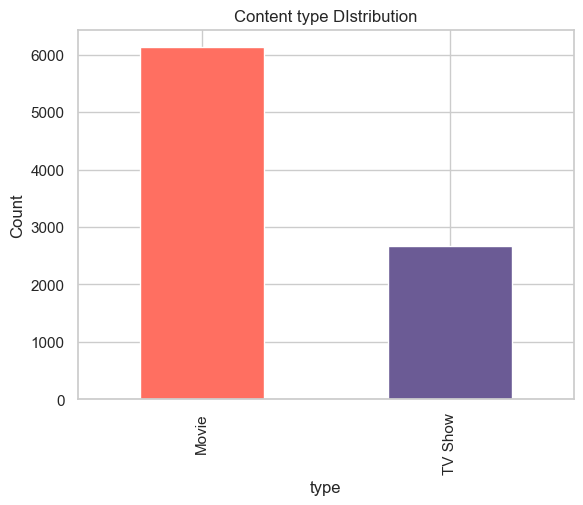

In [7]:
df['type'].value_counts().plot(kind = 'bar', color = ['#ff6f61','#6b5b95'])
plt.title("Content type DIstribution")
plt.ylabel("Count")
plt.show()

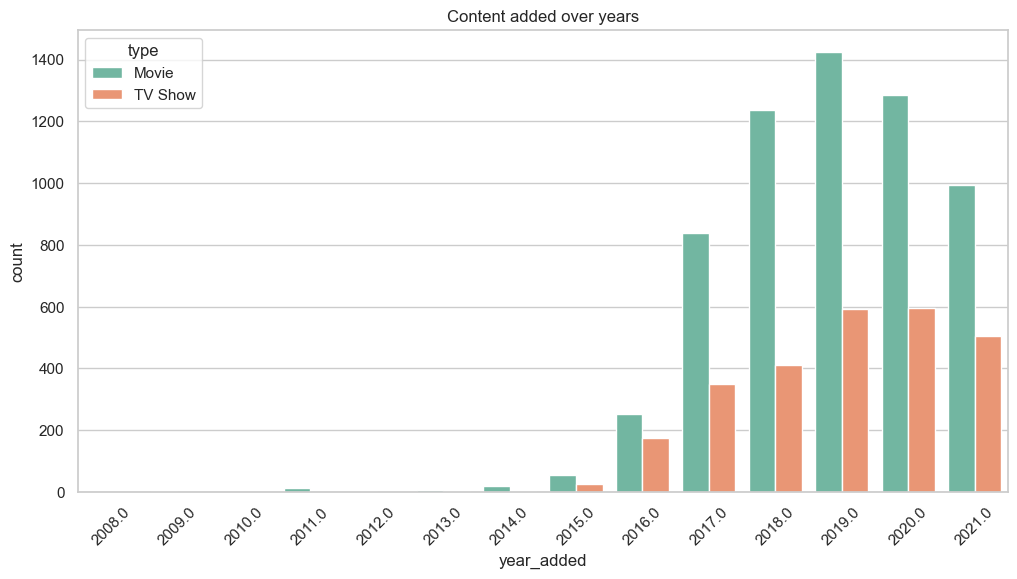

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='year_added',hue='type',palette='Set2')
plt.title("Content added over years")
plt.xticks(rotation=45)
plt.show()

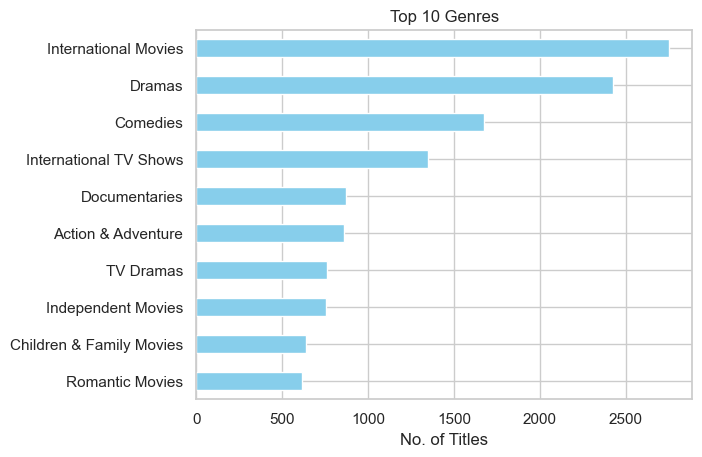

In [9]:
genres = df['listed_in'].str.split(', ',expand = True).stack().value_counts().head(10)

genres.plot(kind='barh',color='skyblue')
plt.title("Top 10 Genres")
plt.xlabel("No. of Titles")
plt.gca().invert_yaxis()
plt.show()

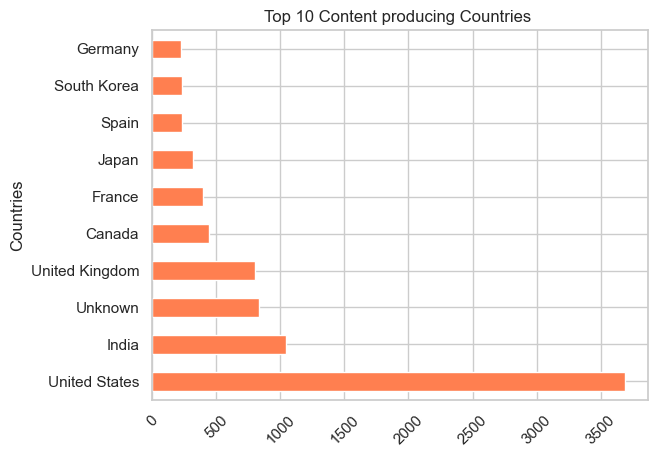

In [10]:
countries = df['country'].str.split(', ',expand = True).stack().value_counts().head(10)

countries.plot(kind='barh',color='coral')
plt.title("Top 10 Content producing Countries ")
plt.ylabel("Countries")
plt.xticks(rotation=45)
plt.show()

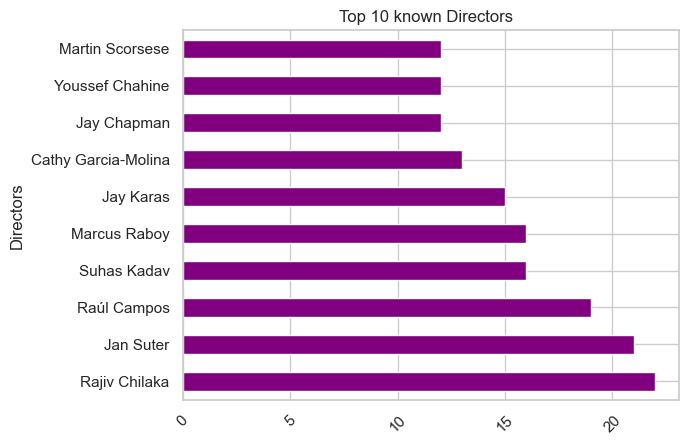

In [11]:
directors = df[df['director'].notna() & (df['director'] != 'Unknown')]

top_directors = directors['director'].str.split(', ',expand = True).stack().value_counts().head(10)
top_directors.plot(kind='barh',color='purple')
plt.title("Top 10 known Directors  ")
plt.ylabel("Directors")
plt.xticks(rotation=45)
plt.show()

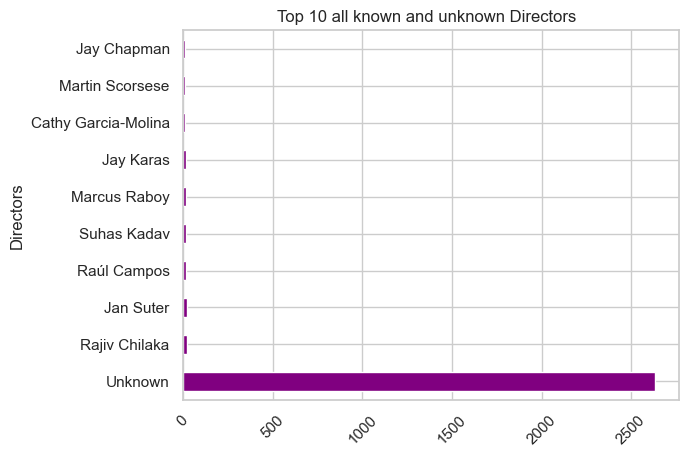

In [12]:
top_directors = df['director'].str.split(', ',expand = True).stack().value_counts().head(10)
top_directors.plot(kind='barh',color='purple')
plt.title("Top 10 all known and unknown Directors  ")
plt.ylabel("Directors")
plt.xticks(rotation=45)
plt.show()

C:\Users\Aryan\AppData\Local\Temp\ipykernel_5500\2521301053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_int'] = df_movie['duration'].str.extract('(\d+)').astype(float)


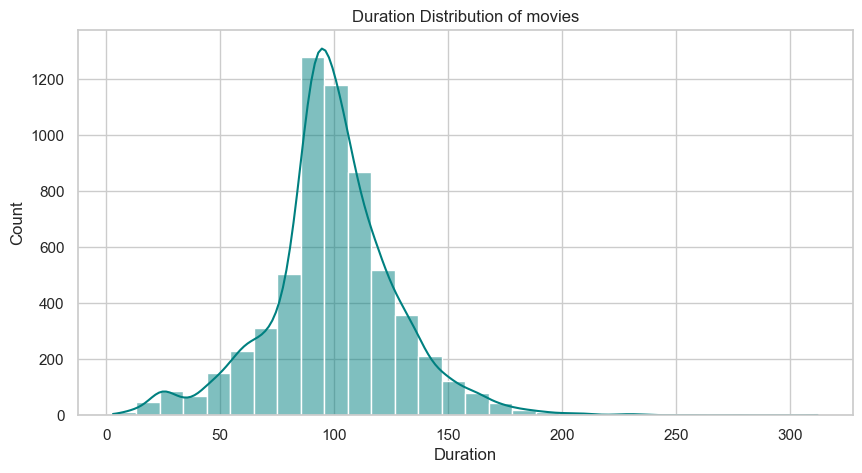

In [13]:
df_movie = df[df['type'] == 'Movie']
df_movie['duration_int'] = df_movie['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(df_movie['duration_int'], bins = 30 , kde = True, color='teal')
plt.title("Duration Distribution of movies")
plt.xlabel("Duration")
plt.show()

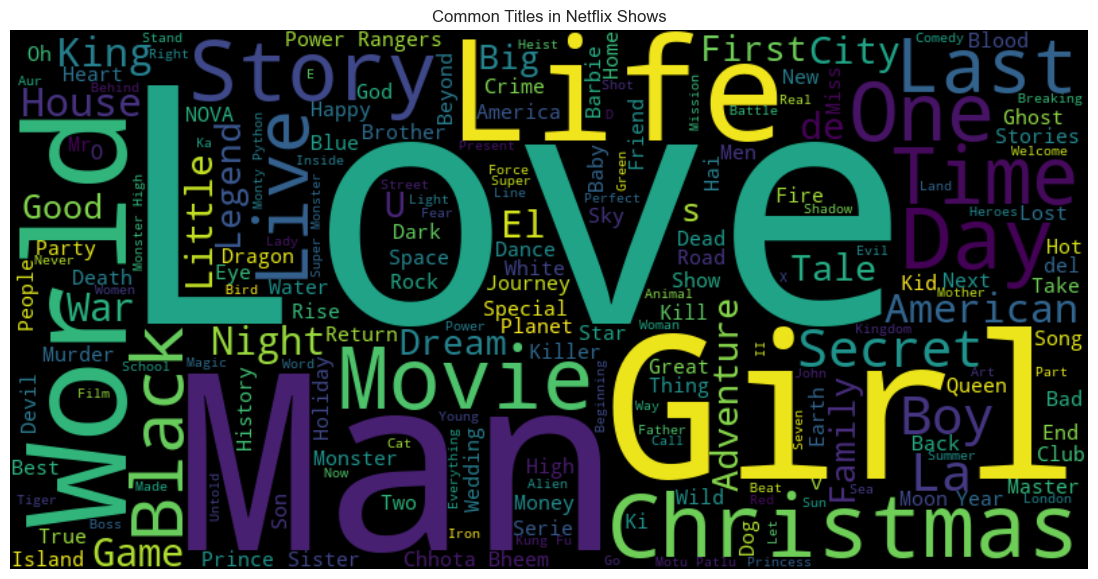

In [14]:
title_words = ' '.join(df['title'])

wordcloud = WordCloud(width = 800, height = 400, background_color = 'black').generate(title_words)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.title("Common Titles in Netflix Shows")
plt.show()